In [1]:
import torch
from tools import config, Wrapper, DatasetQuora
from modelling.models import RNNCNNMatch
from modelling.templates import SimilarityTemplate

In [2]:
%%time
dataset = DatasetQuora(train_file=config.TRAIN_FILE,
                       test_file=config.TEST_FILE, 
                       sample_submission_file=config.SAMPLE_SUBMISSION_FILE)

CPU times: user 1min 11s, sys: 620 ms, total: 1min 12s
Wall time: 1min 12s


In [3]:
rnn_cnn_match = SimilarityTemplate(
    query_model=RNNCNNMatch(), 
    vocab_size=len(dataset.token2index),
    embedding_matrix=dataset.load_pretrained_embeddings(
        embedding_weight_file=config.EMBEDDINGS_FILE,
        verbose=config.VERBOSE),
    loss_type='triplet')

Collect embeddings: 100%|██████████| 2000001/2000001 [02:51<00:00, 11638.80it/s]


In [4]:
optimizer = torch.optim.Adam(rnn_cnn_match.parameters(), lr=0.0001)

In [5]:
rcm = Wrapper(dataset=dataset, 
              model=rnn_cnn_match, 
              optimizer=optimizer, 
              model_name=config.MODEL_NAME, 
              max_norm=0.001,
              batch_size=256,
              generate_negatives_type='hard', 
              hard_negatives_multiplier=8, 
              validation_batch_size_multiplier=8)

Train Epoch 1:   0%|          | 0/466 [00:00<?, ?it/s]/floyd/home/tools/wrapper.py:269: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad.clip_grad_norm(self.model.parameters(), max_norm=self.max_norm)
Train Epoch 1: 100%|██████████| 466/466 [02:12<00:00,  3.55it/s]


Epoch: [1/1] | Triplet loss: 0.589 | Validation Loss: 0.660
Mean Recall: 0.79 | Validation Recall: 0.84


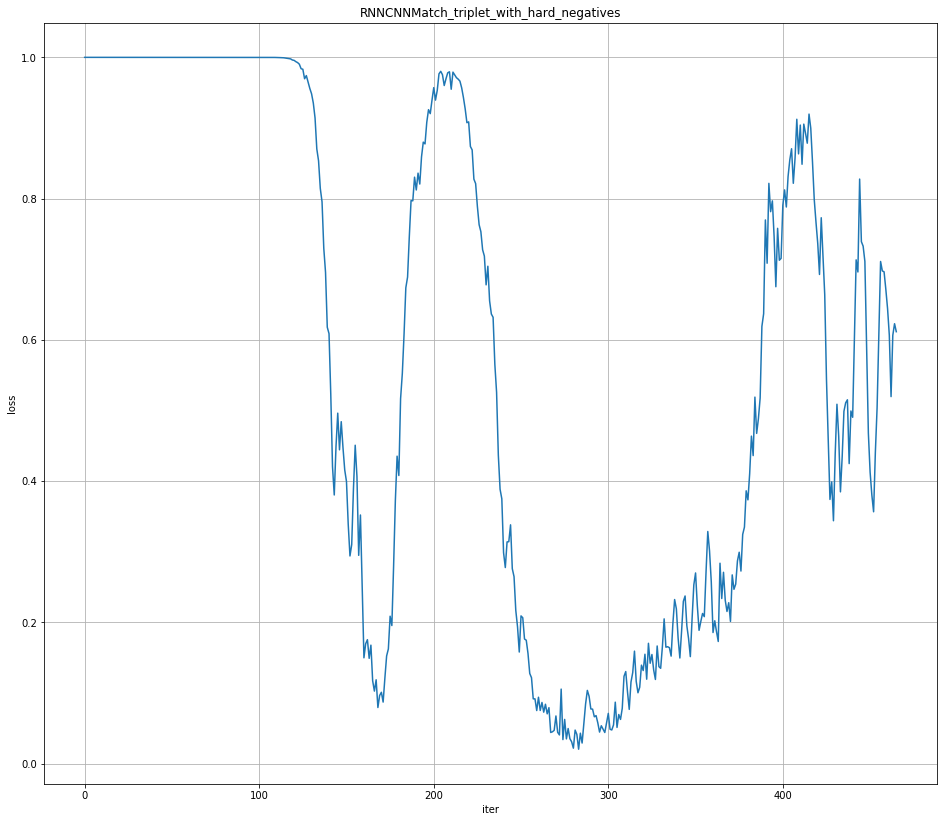

In [6]:
rcm.train(epochs=1, verbose=config.VERBOSE, save_best=True)

In [7]:
rcm.batch_size = 128
rcm.hard_negatives_multiplier = 16
rcm.validation_batch_size_multiplier = 16
rcm.max_norm /= 10

Train Epoch 2:   0%|          | 0/932 [00:00<?, ?it/s]/floyd/home/tools/wrapper.py:269: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad.clip_grad_norm(self.model.parameters(), max_norm=self.max_norm)
Train Epoch 2: 933it [03:15,  4.79it/s]                         
Train Epoch 3:   0%|          | 0/932 [00:00<?, ?it/s]

Epoch: [1/2] | Triplet loss: 0.594 | Validation Loss: 0.318
Mean Recall: 0.86 | Validation Recall: 0.97


Train Epoch 3: 933it [03:16,  4.80it/s]                         


Epoch: [2/2] | Triplet loss: 0.424 | Validation Loss: 0.306
Mean Recall: 0.89 | Validation Recall: 0.91


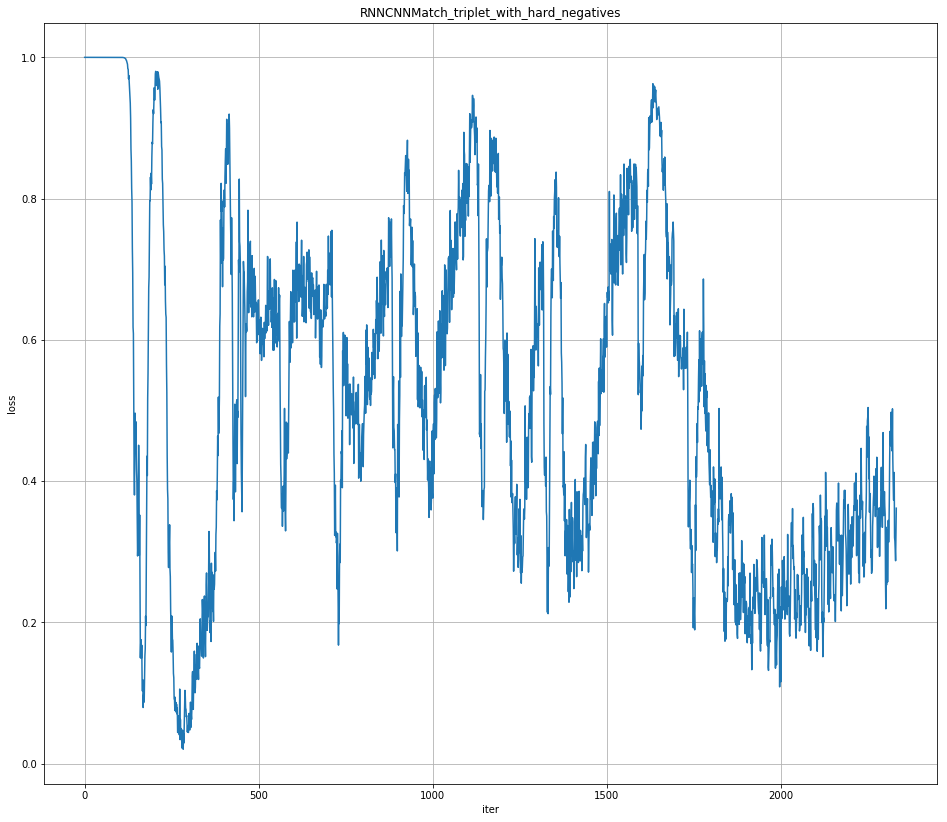

In [8]:
rcm.train(epochs=2, verbose=config.VERBOSE, save_best=True)

In [9]:
rcm.batch_size = 64
rcm.hard_negatives_multiplier = 32
rcm.validation_batch_size_multiplier = 32

In [ ]:
rcm.train(epochs=3, verbose=config.VERBOSE, save_best=True)

Train Epoch 4:   0%|          | 0/1865 [00:00<?, ?it/s]/floyd/home/tools/wrapper.py:269: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad.clip_grad_norm(self.model.parameters(), max_norm=self.max_norm)
Train Epoch 4: 1866it [05:29,  5.76it/s]                          
Train Epoch 5:   0%|          | 1/1865 [00:00<05:26,  5.71it/s]

Epoch: [1/3] | Triplet loss: 0.338 | Validation Loss: 0.456
Mean Recall: 0.93 | Validation Recall: 0.91


Train Epoch 5: 1866it [05:28,  5.73it/s]                          
Train Epoch 6:   0%|          | 1/1865 [00:00<05:29,  5.65it/s]

Epoch: [2/3] | Triplet loss: 0.471 | Validation Loss: 0.341
Mean Recall: 0.92 | Validation Recall: 0.99


Train Epoch 6: 1866it [05:28,  5.73it/s]                          